In [1]:
import render
from torch.optim import Adam
from show import show_result_html

IMAGE_SIZE = 64
DEVICE = 'cpu'
LEARNING_RATE = 0.05

100%|██████████| 2560/2560 [00:32<00:00, 77.58it/s, loss=-9.0122]



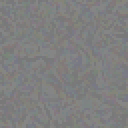
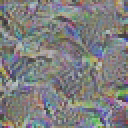
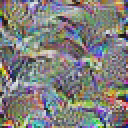
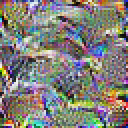
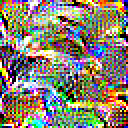
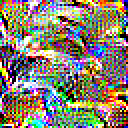

In [6]:
image = render.ParameterizedImage(IMAGE_SIZE, sd=0.01).to(DEVICE)
optimizer = Adam(image.parameters(), lr=LEARNING_RATE)

images, thresholds = render.render_vis("inception4b:branch4:4",
                                       optimizer,
                                       image,
                                       device=DEVICE)

show_result_html(images, thresholds)

100%|██████████| 2560/2560 [00:31<00:00, 80.17it/s, loss=-5.7816]



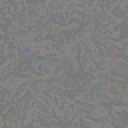
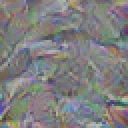
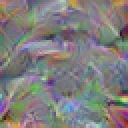
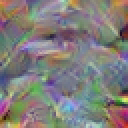
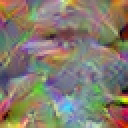
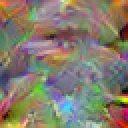

In [4]:
import regularization

L1_weight   = 0.05
TV_weight   = 0.25
Blur_weight = 0.1

image = render.ParameterizedImage(IMAGE_SIZE, sd=0.01).to(DEVICE)
optimizer = Adam(image.parameters(), lr=LEARNING_RATE)

regularizers = [
    regularization.add_regularizer(L1_weight, regularization.l1_reg),
    regularization.add_regularizer(TV_weight, regularization.total_variation),
    regularization.add_regularizer(Blur_weight, regularization.blur_reg),
]

images, thresholds = render.render_vis("inception4b:branch4:4",
                                       optimizer, 
                                       image,
                                       regularizers,
                                       device=DEVICE)
show_result_html(images, thresholds)

100%|██████████| 2560/2560 [00:30<00:00, 84.93it/s, loss=-2.6870]



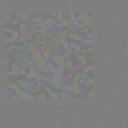
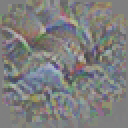
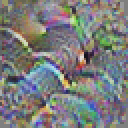
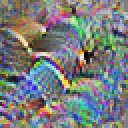
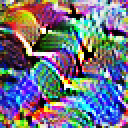
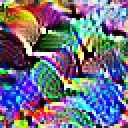

In [5]:
from transformation import TransformationRobustness


image = render.ParameterizedImage(IMAGE_SIZE, sd=0.01).to(DEVICE)
optimizer = Adam(image.parameters(), lr=LEARNING_RATE)
transformations = TransformationRobustness().to(DEVICE)

# obtain ready-to-display feature visualizations
images, thresholds = render.render_vis("inception4b:branch4:4",
                                       optimizer, 
                                       image,
                                       transformations=transformations,
                                       device=DEVICE)
show_result_html(images, thresholds)